# CS145: Project 1 | **The Leaf Impact:** Exploring the Relationship Between Bike Usage and Urban Trees in NYC

## Author
* *Duru Irmak Unsal, duruu*

## Project Overview

---
This project explores the relationship between Citi Bike usage and the presence of trees across New York City. Citi Bike, the largest bike-sharing program in the United States, offers data on bike trips and station locations, while the NYC Street Tree Census dataset provides detailed information on the city's trees, including their species, health, and location. The primary goal of this analysis is to investigate how the presence and condition of trees near Citi Bike stations influence bike usage patterns.

**Questions:**

*Could CitiBike increase bike usage through the optimization of nearby tree greenery?*

- Are bike stations located in areas with higher tree density used more frequently compared to stations in less green areas?
- Does the health of nearby trees have any influence on bike usage at specific stations?
- How do seasonal changes in tree conditions (e.g., foliage in summer vs. bare trees in winter) affect bike usage trends?
- Do different user types prefer stations with more greenery?

By examining these relationships, this project attempts to uncover how urban greenery impacts transportation habits in New York -- potentially providing insights for future urban planning.

---


## Analysis of Dataset

---
## General Table Information
**Table 1: Citi Bike Trips**

This table captures every trip taken on Citi Bikes since the program's launch, with each row representing a single trip. It contains 58,937,715 rows and requires 901.96 MB of physical storage. The table includes information such as trip duration, start and end times, station details (ID, name, latitude, longitude), bike ID, user type, birth year, gender, and customer plan.

**Table 2: Citi Bike Stations**

This table provides information about each Citi Bike station across New York City. It has 2,227 rows and takes up 781.29 KB of physical storage. The columns include station identifiers, location details, region ID, rental methods, capacity, availability status of bikes and docks, and various operational indicators such as installation status and last reported time.

**Table 3: NYC 2015 Street Tree Census Dataset**

This table contains one record per tree from the 2015 NYC Street Tree Census, with 683,788 rows using 23.28 MB of physical storage. It includes detailed attributes about each tree's species, condition, and location. The columns cover a wide range of information, including tree identification, measurements, health status, species names, stewardship indicators, observed problems, location details (address, coordinates, administrative districts), and various geographical identifiers.

### Table Relationships

The **citibike_trips** and **citibike_stations** tables are linked through the *start_station_id* and *end_station_id* fields in the trips table, which correspond to the *station_id* field in the stations table. The tree dataset is independent of the Citi Bike dataset, but it can be linked through geographic proximity by matching the *latitude* and *longitude* fields of the trees and stations.

**Primary Keys:**
Although not speifically determined, for the CitiBike trips tables the primary key is likely a combination of the *starttime* and *bikeid* since these columns work as a unique identifier for a given trip. For the Citibike station table, the primary key is likely the *stationid*. Similarly, for the 2015 Tree Census table, the primary key is likely the unique *treeid*.

**Foreign Keys:**
To link the CitiBike tables together, the *start_station_id* and the *end_station_id* in the CitiBike trips table are foreign keys that map to the primary key (*station_id*) in the trips table. For a relationship between the CitiBike stations table (with latitude and longitude for stations) and a tree table (with latitude and longitude for trees), there isn't a direct foreign key-primary key relationship because the two tables are from different domains. Instead, the relationship between stations and trees is based on spatial proximity for this project.

### Data Issues/Inconsistencies/Limitations
Latitude/Longitude Accuracy: One potential limitation is in the precision of the latitude and longitude values. Slight inaccuracies in the geographic coordinates may impact the accuracy of joins between bike stations and nearby trees.

Data Collection Variability: Some trees are recorded by everyday citizens, which could introduce inconsistencies in the table. Variations in how individuals report tree characteristics, such as species identification or health condition, may affect the accuracy of the data.

Time Mismatch: The Citi Bike data is continuously updated, while the Tree Census table is collected periodically (most recently in 2015). So for this project, the data is only analyzed for the period of Citibike trips between 2015 and 2018 -- under the assumption that the tree census data stays relatively consistent over the three year period.

----

## Data Exploration

In [1]:
# Run this cell to authenticate yourself to BigQuery
from google.colab import auth
auth.authenticate_user() # make sure to "Select All" when authenticating
project_id = "cs145-project-438318"

In [2]:
# Initialize BiqQuery client
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

In [3]:
%%bigquery --project $project_id
# make sure you have the header above for each SQL cell

# here's an example of a SQL query using the NCAA basketball dataset in bigquery-public-data
SELECT id, market, name, mascot, mascot_name
FROM `bigquery-public-data.ncaa_basketball.mascots`
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,id,market,name,mascot,mascot_name
0,2959bd24-7007-41ae-a3a3-abdf26888cfc,Tulsa,Golden Hurricane,Hurricane,Captain Cane
1,ad4bc983-8d2e-4e6f-a8f9-80840a786c64,Arizona State,Sun Devils,Devil,Sparky
2,f2d01b77-0f5d-4574-9e49-2a3eaf822e44,Drexel,Dragons,Dragon,Mario the Magnificent
3,b47d10b8-a2a5-47df-a2f9-7bd0b9d51beb,Bradley,Braves,Gargoyle,Kaboom!
4,0113eea0-c943-4fff-9780-ae0fb099e7ef,Canisius,Golden Griffins,Griffin,Petey


#### (1) 2015 Top 50 Popular CitiBike Stations
This query determines which CitiBike stations were the most frequently used as starting points for trips in 2015, helping to identify the most popular locations for bike rentals during that year and gives insight on how many trips do popular stations start.

In [4]:
%%bigquery --project $project_id
SELECT start_station_name, start_station_latitude, start_station_longitude,
    COUNT(*) AS total_trips
  FROM
    `bigquery-public-data.new_york_citibike.citibike_trips`
  WHERE
    EXTRACT(YEAR FROM starttime) = 2015
  GROUP BY
    start_station_name, start_station_latitude, start_station_longitude
  ORDER BY
    total_trips DESC
  LIMIT 50

Query is running:   0%|          |

Downloading:   0%|          |

,start_station_name,start_station_latitude,start_station_longitude,total_trips
0,Pershing Square North,40.751873,-73.977706,104813
1,Lafayette St & E 8 St,40.730287,-73.990765,95890
2,W 21 St & 6 Ave,40.741740,-73.994156,87149
3,E 17 St & Broadway,40.737050,-73.990093,86108
4,8 Ave & W 31 St,40.750967,-73.994442,80736
5,West St & Chambers St,40.717548,-74.013221,79061
6,Broadway & E 14 St,40.734546,-73.990741,73682
7,Broadway & E 22 St,40.740343,-73.989551,67497
8,Vesey Pl & River Terrace,40.715338,-74.016584,65630
9,Carmine St & 6 Ave,40.730386,-74.002150,65614


### (2) Average Number of Trips Across Stations From 2015-2018 -- Subquery
This query looks at the stations that were used between 2015 and 2018, and by counting all trips from each station, finds the average (as well as max and min values)of the number of trips. This helps to understand what is the range of bike usage patterns across these stations.

In [5]:
%%bigquery --project $project_id
SELECT
  AVG(total_trips) as avg_trips_across_stations,
  MAX(total_trips) as max_trip_count,
  MIN(total_trips) as min_trip_count

  FROM(
   -- Count number of trips per station in 2015 to 2018
  SELECT
    start_station_name, start_station_latitude, start_station_longitude,
    COUNT(*) AS total_trips
  FROM
    `bigquery-public-data.new_york_citibike.citibike_trips`
  WHERE
    EXTRACT(YEAR FROM starttime) = 2015 OR EXTRACT(YEAR FROM starttime) = 2018
  GROUP BY
    start_station_name, start_station_latitude, start_station_longitude
  ORDER BY
    total_trips DESC
);

Query is running:   0%|          |

Downloading:   0%|          |

,avg_trips_across_stations,max_trip_count,min_trip_count
0,17518.520763,160803,1


### (3) Amount of Popular 2015 CitiBike Stations in Top 50 Largest Capacity
This query attempts to see if the top 50 used CitiBike stations in 2015 coincide with the stations that have the largest capacity. This is trying to rule out a relationship between size of the CitiBike station and it's use.

In [6]:
%%bigquery --project $project_id
WITH popular_stations AS (
  -- get the station id, name, and total trips (i.e. trip starts) from the top
  -- 50 stations
  SELECT
    start_station_id, start_station_name, COUNT(*) AS total_trips
  FROM
    `bigquery-public-data.new_york_citibike.citibike_trips`
  WHERE
    EXTRACT(YEAR FROM starttime) = 2015
  GROUP BY
    start_station_id, start_station_name
  ORDER BY
    total_trips DESC
  LIMIT 50
)
SELECT
  p.start_station_name, p.total_trips, s.capacity
FROM
  popular_stations p
JOIN
  `bigquery-public-data.new_york_citibike.citibike_stations` s
ON
  -- p.start_station_id is stored as an INT, while s.station_id is a STRING
  CAST(p.start_station_id AS STRING) = CAST(s.station_id AS STRING)
ORDER BY
  s.capacity DESC
LIMIT 50;

Query is running:   0%|          |

Downloading: |          |

,start_station_name,total_trips,capacity


### (4) Seasonal Usage of Citibikes
This query looks at how bike usage varies by season across multiple years (2015-2018); it can help identify trends in bike usage. This trend is refernced back to in other queries to understand if the pattern is consistent even across stations with varying nearby greenery.

In [23]:
%%bigquery --project $project_id
SELECT
    EXTRACT(YEAR FROM starttime) AS trip_year,
    CASE
      WHEN EXTRACT(MONTH FROM starttime) IN (12, 1, 2) THEN 'Winter'
      WHEN EXTRACT(MONTH FROM starttime) IN (3, 4, 5) THEN 'Spring'
      WHEN EXTRACT(MONTH FROM starttime) IN (6, 7, 8) THEN 'Summer'
      WHEN EXTRACT(MONTH FROM starttime) IN (9, 10, 11) THEN 'Fall'
    END AS season,
    COUNT(*) AS total_trips
  FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
  WHERE
    EXTRACT(YEAR FROM starttime) BETWEEN 2015 AND 2018
  GROUP BY
    trip_year, season
ORDER BY
  trip_year, season, total_trips DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,trip_year,season,total_trips
0,2015,Fall,3489221
1,2015,Spring,1956202
2,2015,Summer,3205939
3,2015,Winter,1286607
4,2016,Fall,1648856
5,2016,Spring,3145350
6,2016,Summer,4398091
7,2016,Winter,1070352
8,2017,Fall,5106339
9,2017,Spring,2838672


### (5) Average Seasonal Citibike Usage Across 2015-2018 -- Subquery
This is similar to the query above (Query 4), however, it is just averaging over the seasons across the three years timespan.

In [22]:
%%bigquery --project $project_id
SELECT season, AVG(total_trips) as seasonal_avg
FROM (
  -- table of number of trips during each season for years 2015-2018
  SELECT
    EXTRACT(YEAR FROM starttime) AS trip_year,
    CASE
      WHEN EXTRACT(MONTH FROM starttime) IN (12, 1, 2) THEN 'Winter'
      WHEN EXTRACT(MONTH FROM starttime) IN (3, 4, 5) THEN 'Spring'
      WHEN EXTRACT(MONTH FROM starttime) IN (6, 7, 8) THEN 'Summer'
      WHEN EXTRACT(MONTH FROM starttime) IN (9, 10, 11) THEN 'Fall'
    END AS season,
    COUNT(*) AS total_trips
  FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
  WHERE
    EXTRACT(YEAR FROM starttime) BETWEEN 2015 AND 2018
  GROUP BY
    trip_year, season
)
-- creating a bigger aggregate where it's the average for the season across multiple years
GROUP BY
  season
ORDER BY
  seasonal_avg DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,season,seasonal_avg
0,Summer,4.295907e+06
1,Fall,3.414805e+06
2,Spring,3.012287e+06
3,Winter,1.202258e+06


# Question Driven Queries:

#### *Are bike stations located in areas with higher tree density used more frequently compared to stations in less green areas?*

#### (6) Average Tree Density and Trip Amount Per Station -- CTE
This query calculates the average tree density around each bike station and compares it with the trips counts for those stations from 2015-2018. This is used to understand if there's a relationship between number of trips and number of trees.



In [9]:
%%bigquery --project $project_id
WITH station_trips AS (
  -- number of trips per station
  SELECT
    start_station_name,
    start_station_latitude,
    start_station_longitude,
    COUNT(*) AS total_trips
  FROM
    `bigquery-public-data.new_york_citibike.citibike_trips`
  WHERE
    EXTRACT(YEAR FROM starttime) BETWEEN 2015 AND 2018
  GROUP BY
    start_station_name, start_station_latitude, start_station_longitude
),

nearby_trees AS (
  -- number of trees near stations based on proximity (defined as within 100 meters)
  SELECT
    s.start_station_name,
    s.total_trips,
    COUNT(t.tree_id) AS num_trees_near_station
  FROM
    station_trips s
  LEFT JOIN
    `bigquery-public-data.new_york_trees.tree_census_2015` t
  ON
    ST_DISTANCE(ST_GEOGPOINT(s.start_station_longitude, s.start_station_latitude),
                ST_GEOGPOINT(t.longitude, t.latitude)) <= 100
  GROUP BY
    s.start_station_name, s.total_trips
),

quartiles AS (
  -- calc. quartiles for num_trees_near_station
  SELECT
    nt.start_station_name,
    nt.total_trips,
    nt.num_trees_near_station,
    -- assign quartile based on num_trees_near_station
    NTILE(4) OVER (ORDER BY nt.num_trees_near_station) AS quartile
  FROM
    nearby_trees nt
)

SELECT
  quartile,
  AVG(total_trips) AS avg_trips
FROM
  quartiles
GROUP BY
  quartile
ORDER BY
  quartile;

Query is running:   0%|          |

Downloading:   0%|          |

,quartile,avg_trips
0,1,53862.472574
1,2,35877.679325
2,3,36319.641350
3,4,42675.734177


#### *Does the health of nearby trees have any influence on bike usage at specific stations?*

#### (7) Porportion of Healthy Trees and Trips For Stations (with high proportions of healthy trees) -- CTE

This query looks at the stations with a high proportion of healthy trees in an 100 meter radius to try and understand if there's a pattern between the proportion of healthy trees around a station and the number of trips started at that station.

In [10]:
%%bigquery --project $project_id
WITH station_trips AS(
  -- number of trips per station from 2015 to 2018
  SELECT
    start_station_name, COUNT(*) AS total_trips
  FROM
    `bigquery-public-data.new_york_citibike.citibike_trips`
  WHERE
    EXTRACT(YEAR FROM starttime) BETWEEN 2015 AND 2018
  GROUP BY
    start_station_name
),

tree_health AS (
  -- total number of trees and number of healthy trees (health = 'Good') near each station
  SELECT
    s.name AS station_name, COUNT(t.tree_id) AS total_trees,
    SUM(CASE WHEN t.health = 'Good' THEN 1 ELSE 0 END) AS healthy_trees
  FROM
    `bigquery-public-data.new_york_citibike.citibike_stations` s
  LEFT JOIN
    `bigquery-public-data.new_york_trees.tree_census_2015` t
  ON
    ST_DISTANCE(ST_GEOGPOINT(s.longitude, s.latitude),
                ST_GEOGPOINT(t.longitude, t.latitude)) <= 100
  GROUP BY
    s.name
),

combined_data AS (
  SELECT th.station_name, st.total_trips, th.total_trees, th.healthy_trees,
    SAFE_DIVIDE(th.healthy_trees, th.total_trees) AS proportion_healthy_trees
  FROM
    tree_health th
  JOIN
    station_trips st ON th.station_name = st.start_station_name
),

quartiles AS (
  -- calculate quartiles for proportion of healthy trees
  SELECT
    station_name, total_trips, total_trees, healthy_trees, proportion_healthy_trees,
    NTILE(4) OVER (ORDER BY proportion_healthy_trees) AS quartile
  FROM
    combined_data
)

SELECT
  quartile, AVG(total_trips) AS avg_total_trips
FROM
  quartiles
GROUP BY
  quartile
ORDER BY
  quartile;

Query is running:   0%|          |

Downloading:   0%|          |

,quartile,avg_total_trips
0,1,52024.734940
1,2,44667.897590
2,3,40624.885542
3,4,49271.222892


#### (8) Porportion of Unhealthy Trees and Trips For Stations
This query looks at the stations with a high proportion of unhealthy trees in an 100 meter radius to try and understand if there's a pattern between the proportion of unhealthy trees around a station and the number of trips started at that station. This can be compared to the previous query as well.

In [11]:
%%bigquery --project $project_id
WITH station_trips AS (
  -- count number of trips per station from 2015 to 2018
  SELECT
    start_station_name, COUNT(*) AS total_trips
  FROM
    `bigquery-public-data.new_york_citibike.citibike_trips`
  WHERE
    EXTRACT(YEAR FROM starttime) BETWEEN 2015 AND 2018
  GROUP BY
    start_station_name
),

tree_health AS (
  -- count total number of trees and number of unhealthy trees (health = 'Poor') near each station
  SELECT
    s.name AS station_name, COUNT(t.tree_id) AS total_trees,
    SUM(CASE WHEN t.health = 'Poor' THEN 1 ELSE 0 END) AS unhealthy_trees
  FROM
    `bigquery-public-data.new_york_citibike.citibike_stations` s
  LEFT JOIN
    `bigquery-public-data.new_york_trees.tree_census_2015` t
  ON
    ST_DISTANCE(ST_GEOGPOINT(s.longitude, s.latitude),
                ST_GEOGPOINT(t.longitude, t.latitude)) <= 100
  GROUP BY
    s.name
),

combined_data AS (
  SELECT th.station_name, st.total_trips, th.total_trees, th.unhealthy_trees,
    SAFE_DIVIDE(th.unhealthy_trees, th.total_trees) AS proportion_unhealthy_trees
  FROM
    tree_health th
  JOIN
    station_trips st ON th.station_name = st.start_station_name
),

quartiles AS (
  -- calculate quartiles for proportion of unhealthy trees
  SELECT
    station_name, total_trips, total_trees, unhealthy_trees, proportion_unhealthy_trees,
    NTILE(4) OVER (ORDER BY proportion_unhealthy_trees) AS quartile
  FROM
    combined_data
)

SELECT
  quartile, AVG(total_trips) AS avg_total_trips
FROM
  quartiles
GROUP BY
  quartile
ORDER BY
  quartile;

Query is running:   0%|          |

Downloading:   0%|          |

,quartile,avg_total_trips
0,1,50249.108434
1,2,41037.355422
2,3,50596.753012
3,4,44705.524096


#### *How do seasonal changes in tree conditions (e.g., leaves in summer vs. bare trees in winter) affect bike usage trends?*

#### (9) Stations with More Healthy Trees and Seasonal Changes -- Window Function
This query looks at the stations with the top proportions of healthy trees in a 100 meter radius and their seasonal patterns. By examining the trips at the stations throughout different seasons in the year, we can see if bike usage is higher in the months where healthy trees are overall "prettier" (summer, fall, and spring).

In [12]:
%%bigquery --project $project_id
WITH tree_health AS (
  -- count total number of trees and number of healthy trees near each station
  SELECT
    s.name AS station_name, COUNT(t.tree_id) AS total_trees,
    SUM(CASE WHEN t.health = 'Good' THEN 1 ELSE 0 END) AS healthy_trees,
    SAFE_DIVIDE(SUM(CASE WHEN t.health = 'Good' THEN 1 ELSE 0 END), COUNT(t.tree_id)) AS proportion_healthy_trees
  FROM
    `bigquery-public-data.new_york_citibike.citibike_stations` s
  LEFT JOIN
    `bigquery-public-data.new_york_trees.tree_census_2015` t
  ON
    ST_DISTANCE(ST_GEOGPOINT(s.longitude, s.latitude),
                ST_GEOGPOINT(t.longitude, t.latitude)) <= 100
  GROUP BY
    station_name
),

high_health_stations AS (
  -- select stations with a high proportion of healthy trees
  SELECT
    station_name, proportion_healthy_trees
  FROM
    tree_health
  WHERE
    proportion_healthy_trees IS NOT NULL
  ORDER BY
    proportion_healthy_trees DESC
  LIMIT 50
),

station_trips AS (
  -- count number of trips per station and season
  SELECT
    t.start_station_name,
    CASE
      WHEN EXTRACT(MONTH FROM t.starttime) IN (6, 7, 8) THEN 'Summer'
      WHEN EXTRACT(MONTH FROM t.starttime) IN (9, 10) THEN 'Fall'
      WHEN EXTRACT(MONTH FROM t.starttime) IN (12, 1, 2) THEN 'Winter'
      ELSE 'Spring'
    END AS season,
    COUNT(*) AS total_trips
  FROM
    `bigquery-public-data.new_york_citibike.citibike_trips` t
  JOIN
    high_health_stations h
  ON
    t.start_station_name = h.station_name
  WHERE
    EXTRACT(YEAR FROM t.starttime) BETWEEN 2015 AND 2018
  GROUP BY
    start_station_name, season
),

seasonal_trips AS (
  -- calculate the average trips per season for each station
  SELECT
    start_station_name, season, AVG(total_trips) AS avg_trips
  FROM
    station_trips
  GROUP BY
    start_station_name, season
)

SELECT
  start_station_name, season, avg_trips,
  RANK() OVER (PARTITION BY start_station_name ORDER BY avg_trips DESC) AS rank_avg_trips
FROM
  seasonal_trips
ORDER BY
  season, rank_avg_trips;

Query is running:   0%|          |

Downloading:   0%|          |

,start_station_name,season,avg_trips,rank_avg_trips
0,Vernon Blvd & 41 Rd,Fall,300.0,2
1,Broadway & Moylan Pl,Fall,1425.0,2
2,Columbia St & W 9 St,Fall,319.0,3
3,Broadway & W 38 St,Fall,2451.0,3
4,Central Park West & W 72 St,Fall,26505.0,3
5,E 24 St & Park Ave S,Fall,27010.0,3
6,Fulton St & Broadway,Fall,17237.0,3
7,William St & Pine St,Fall,11583.0,3
8,South St & Whitehall St,Fall,15607.0,3
9,W 44 St & 5 Ave,Fall,20139.0,3


#### *Do different user types prefer stations with more greenery?*

#### (10) Different Users Preferences for Stations with Different Tree Densities - Window Function

This query attempts to understand if the two user types (customer and subscriber) have different preferences on stations with or without a lot of trees. The query ranks the preferences of each user by the total amount of trips for a given quantile of tree denisty around a station.

In [13]:
%%bigquery --project $project_id
WITH station_trips AS (
  -- number of trips per station by user type
  SELECT
    start_station_name, t.usertype, COUNT(*) AS total_trips
  FROM
    `bigquery-public-data.new_york_citibike.citibike_trips` t
  GROUP BY
    start_station_name, t.usertype
),

tree_density AS (
  -- number of trees near each station
  SELECT
    s.name AS start_station_name, COUNT(t.tree_id) AS num_trees_near_station
  FROM
    `bigquery-public-data.new_york_citibike.citibike_stations` s
  LEFT JOIN
    `bigquery-public-data.new_york_trees.tree_census_2015` t
  ON
    ST_DISTANCE(ST_GEOGPOINT(s.longitude, s.latitude),
                ST_GEOGPOINT(t.longitude, t.latitude)) <= 100
  GROUP BY
    s.name
),

combined AS (
  -- Combine trip table with tree table
  SELECT
    st.start_station_name, st.usertype, st.total_trips, td.num_trees_near_station
  FROM
    station_trips st
  JOIN
    tree_density td
  ON
  st.start_station_name = td.start_station_name
),

ranked_stations AS (
  -- assign quantiles based on the number of nearby trees
  SELECT
    start_station_name, usertype, total_trips, num_trees_near_station,
    NTILE(4) OVER (ORDER BY num_trees_near_station DESC) AS tree_quantile
  FROM
    combined
),

ranked_user_types AS (
  -- rank each quantile of trees by total trips within each user type
  SELECT
    tree_quantile, usertype, SUM(total_trips) AS total_user_trips,
    RANK() OVER (PARTITION BY usertype ORDER BY SUM(total_trips) DESC) AS user_rank
  FROM
    ranked_stations
  GROUP BY
    tree_quantile, usertype
)

SELECT
  tree_quantile, usertype, total_user_trips, user_rank
FROM
  ranked_user_types
ORDER BY
  tree_quantile, user_rank;

Query is running:   0%|          |

Downloading:   0%|          |

,tree_quantile,usertype,total_user_trips,user_rank
0,1,Customer,977631,2
1,1,Subscriber,8084624,2
2,2,Subscriber,7836963,3
3,2,Customer,855369,4
4,3,Customer,933960,3
5,3,Subscriber,7062024,4
6,4,Customer,1996585,1
7,4,Subscriber,12830978,1


## Conclusion

---

The top 15 CitiBike stations in 2015 each had over 60,000 trips, significantly exceeding the three-year average of 17,518 trips per station. Seasonal patterns remain consistent across the studied years, with summer being the most popular season and winter the least. The relationship between tree density and station usage is complex, with the highest average trips occurring in both the lowest and highest tree density quartiles. A similar pattern is observed for the proportion of healthy trees, while the impact of unhealthy trees on usage is less clear. Seasonal patterns for stations with healthy trees generally show higher usage in spring and summer, though it's unclear whether this is due to tree aesthetics or overall seasonal trends that were observed previously. User behavior indicates that while there isn't a clear preference for tree density overall, customer) show a marked increase in trips from low-density to high-density tree areas, doubling their usage.

However, based on the data observed, the relationship between urban greenery and CitiBike usage in New York City is complex and. The data suggests that while green space may play a role in bike-sharing usage, its impact is intertwined with other urban factors such as location, population density, and proximity to key destinations. Optimizing nearby greenery could potentially increase CitiBike usage in certain contexts, particularly for regular users and in areas with very high tree density and health. Although, interestingly, popular stations do not align with those having the largest bike capacity, suggesting that maybe a better optimization point is a need for capacity optimization rather than focusing solely on greenery.


---

## Limitations and Further Analysis

---

While the focus on tree density and health provides some vague insights, bike usage is likely influenced by a complex set of variables (i.e. socioeconomic factors, proximity to locations, capacity, urban infrastructure, etc.). Future analysis should incorporate these variables and consider their interactions to offer a more thorough understanding of bike usage patterns. Additionally, spatial factors such as the geographical context of stations and their relationships with surrounding areas were not looked at. It is likely that stations with high usage may be located in densely populated regions with significant foot traffic, while low-usage stations might be in more outskirt areas. Moreover, differences between customer and subscriber behavior regarding tree density are observed but not fully explained. Factors such as trip purpose, frequency, and personal preferences were not explored (and also not all were avialable to explore given the datasets). Also, the choice of a 100-meter radius for counting nearby trees is somewhat arbitrary. The influence of greenery on bike users may extend beyond or be more localized than this distance, and further analysis could look at varying radiuses to understand if there is an underlying pattern that wasn't observed here.

---

### Additional Line of Questioning

*What are the patterns of stations that are used more during the Winter months?*

#### (11) Stations with Higher Winter Usage than Summer

This query looks to see if there's any CitiBike stations that are used more in the winter than in the summer.

In [14]:
%%bigquery --project $project_id
WITH winter_usage AS (
  -- total bike usage per station during the winter
  SELECT
    start_station_name AS station_name, COUNT(*) AS winter_trips
  FROM
    `bigquery-public-data.new_york_citibike.citibike_trips`
  WHERE
    (EXTRACT(YEAR FROM starttime) = 2015 OR EXTRACT(YEAR FROM starttime) = 2018)
    AND EXTRACT(MONTH FROM starttime) IN (1, 2, 12)
  GROUP BY
    start_station_name
),
summer_usage AS (
  -- total bike usage per station during the summer
  SELECT start_station_name AS station_name, COUNT(*) AS summer_trips
  FROM
    `bigquery-public-data.new_york_citibike.citibike_trips`
  WHERE
    (EXTRACT(YEAR FROM starttime) = 2015 OR EXTRACT(YEAR FROM starttime) = 2018)
    AND EXTRACT(MONTH FROM starttime) IN (6, 7, 8)
  GROUP BY
    start_station_name
)
-- comparing usage between summer and winter
SELECT
  w.station_name, w.winter_trips, s.summer_trips,
  (w.winter_trips - s.summer_trips) AS trip_difference
FROM
  winter_usage w
JOIN
  summer_usage s
ON
  w.station_name = s.station_name
WHERE
  w.winter_trips > s.summer_trips
ORDER BY
  trip_difference DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,station_name,winter_trips,summer_trips,trip_difference
0,W 13 St & Hudson St,6814,69,6745
1,W 63 St & Broadway,6386,58,6328
2,Great Jones St,13035,7406,5629
3,Lexington Ave & E 29 St,7426,2605,4821
4,E 55 St & 3 Ave,4979,266,4713
...,...,...,...,...
116,Avenue D & E 3 St,4589,4524,65
117,Monroe St & Bedford Ave,1792,1735,57
118,Railroad Ave & Kay Ave,233,208,25
119,Clinton St & Joralemon St,3508,3490,18


About 18.5% of stations have less trips during the summer than during the winter.

#### (12) Given that there are a lot of stations that don't follow the summer-winter pattern observed: *What is the tree density at these stations?*

In [15]:
%%bigquery --project $project_id
WITH winter_usage AS (
  -- total bike usage per station during the winter
  SELECT
    start_station_name AS station_name, COUNT(*) AS winter_trips
  FROM
    `bigquery-public-data.new_york_citibike.citibike_trips`
  WHERE
    (EXTRACT(YEAR FROM starttime) = 2015 OR EXTRACT(YEAR FROM starttime) = 2018)
    AND EXTRACT(MONTH FROM starttime) IN (1, 2, 12)
  GROUP BY
    start_station_name
),
summer_usage AS (
  -- total bike usage per station during the summer
  SELECT
    start_station_name AS station_name, COUNT(*) AS summer_trips
  FROM
    `bigquery-public-data.new_york_citibike.citibike_trips`
  WHERE
    (EXTRACT(YEAR FROM starttime) = 2015 OR EXTRACT(YEAR FROM starttime) = 2018)
    AND EXTRACT(MONTH FROM starttime) IN (6, 7, 8)
  GROUP BY
    start_station_name
),
station_usage AS (
  -- join winter and summer usage, find stations where winter usage is higher
  SELECT
    w.station_name, w.winter_trips, s.summer_trips,
    (w.winter_trips - s.summer_trips) AS trip_difference
  FROM
    winter_usage w
  JOIN
    summer_usage s
  ON
    w.station_name = s.station_name
  WHERE
    w.winter_trips > s.summer_trips
  ORDER BY
    trip_difference DESC
),
tree_density AS (
  -- number of trees within a 100-mile radius of each station
  SELECT cs.name, cs.latitude AS station_lat, cs.longitude AS station_lon,
    COUNT(tc.tree_id) AS nearby_trees
  FROM
    `bigquery-public-data.new_york_citibike.citibike_stations` cs
  JOIN
    `bigquery-public-data.new_york_trees.tree_census_2015` tc
  ON
    ST_DISTANCE(ST_GEOGPOINT(cs.longitude, cs.latitude),
    ST_GEOGPOINT(tc.longitude, tc.latitude)) <= 100
  GROUP BY
    cs.name, cs.latitude, cs.longitude
)

SELECT
  su.station_name,  su.winter_trips, su.summer_trips, su.trip_difference,
  td.nearby_trees
FROM
  station_usage su
JOIN
  tree_density td
ON
  su.station_name = td.name
ORDER BY
  su.trip_difference DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,station_name,winter_trips,summer_trips,trip_difference,nearby_trees
0,W 63 St & Broadway,6386,58,6328,73
1,Great Jones St,13035,7406,5629,14
2,Lexington Ave & E 29 St,7426,2605,4821,56
3,N 6 St & Bedford Ave,5143,481,4662,60
4,W 49 St & 8 Ave,10393,6162,4231,53
...,...,...,...,...,...
96,Clinton Ave & Myrtle Ave,4443,4365,78,66
97,Carlton Ave & Park Ave,1628,1553,75,31
98,Monroe St & Bedford Ave,1792,1735,57,25
99,Clinton St & Joralemon St,3508,3490,18,78


#### (13) Average Number of Trees Around Stations

Compare the output of the above query to the average number of trees in a 100 meter radius of all stations used between 2015 and 2018.

In [16]:
%%bigquery --project $project_id
WITH all_stations AS (
  -- table of all stations that had trips between 2015 and 2018
  SELECT DISTINCT
    start_station_name AS station_name, start_station_latitude, start_station_longitude
  FROM
    `bigquery-public-data.new_york_citibike.citibike_trips`
  WHERE
    EXTRACT(YEAR FROM starttime) BETWEEN 2015 AND 2018
),
tree_density AS (
  -- number of trees within a 100-meter radius of each station
  SELECT
    s.station_name, COUNT(tc.tree_id) AS nearby_trees
  FROM
    all_stations s
  JOIN
    `bigquery-public-data.new_york_trees.tree_census_2015` tc
  ON
    ST_DISTANCE(ST_GEOGPOINT(s.start_station_longitude, s.start_station_latitude),
                ST_GEOGPOINT(tc.longitude, tc.latitude)) <= 100
  GROUP BY
    s.station_name
)

SELECT
  AVG(nearby_trees) AS avg_trees_per_station
FROM
  tree_density;


Query is running:   0%|          |

Downloading:   0%|          |

,avg_trees_per_station
0,45.06492


There are multiple stations that have greater trips during the winter months compared to the summer months, but still have an amount of trees near the station that is greater than the average number of trees near all stations.

## Extended Notes: Visualizations for Query 6-8
Visualization of the denisty and proportion of healthy and nonhealthy trees against trip amounts for various stations. This is just a helpful way to see that there is no clear linear relatioship.

In [17]:
query6 = """
WITH station_trips AS (
  -- count number of trips per station
  SELECT start_station_name, start_station_latitude, start_station_longitude,
    COUNT(*) AS total_trips
  FROM
    `bigquery-public-data.new_york_citibike.citibike_trips`
  WHERE
    EXTRACT(YEAR FROM starttime) BETWEEN 2015 AND 2018 -- Years 2015 to 2018
  GROUP BY
    start_station_name, start_station_latitude, start_station_longitude
  ORDER BY
    total_trips DESC
),

nearby_trees AS (
  -- get number of trees near stations based on proximity (defined as within 100 meters)
  SELECT s.start_station_name, s.total_trips, t.tree_id,t.health,
    ST_DISTANCE(ST_GEOGPOINT(s.start_station_longitude, s.start_station_latitude),
                ST_GEOGPOINT(t.longitude, t.latitude)) AS distance_to_station
  FROM
    station_trips s
  LEFT JOIN
    `bigquery-public-data.new_york_trees.tree_census_2015` t
  ON
    ST_DISTANCE(ST_GEOGPOINT(s.start_station_longitude, s.start_station_latitude),
                ST_GEOGPOINT(t.longitude, t.latitude)) <= 100
)

SELECT
  s.start_station_name, s.total_trips, COUNT(t.tree_id) AS num_trees_near_station
FROM
  station_trips s
LEFT JOIN
  nearby_trees t ON s.start_station_name = t.start_station_name
GROUP BY
  s.start_station_name, s.total_trips
ORDER BY
  COUNT(t.tree_id) DESC;
"""


df = client.query(query6).to_dataframe()

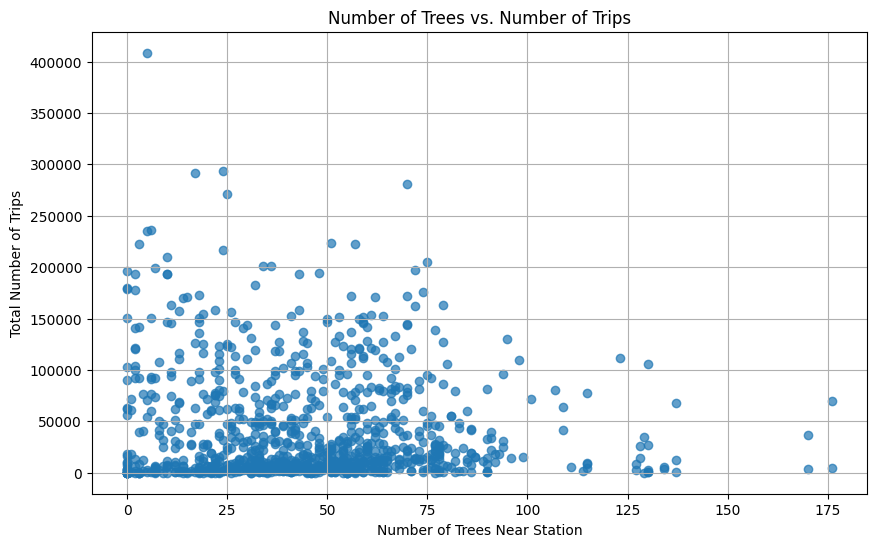

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['num_trees_near_station'], df['total_trips'], alpha=0.7)
plt.title('Number of Trees vs. Number of Trips')
plt.xlabel('Number of Trees Near Station')
plt.ylabel('Total Number of Trips')
plt.grid(True)
plt.show()

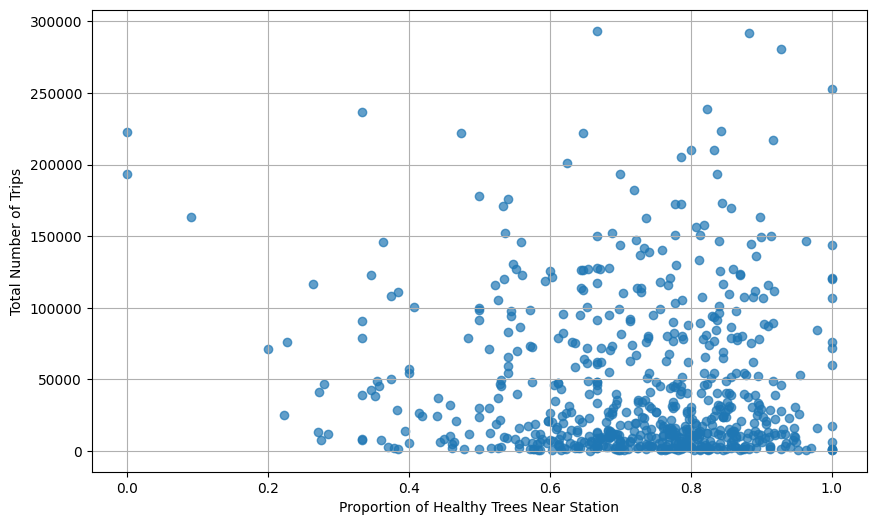

In [19]:
query7 = """
WITH station_trips AS (
  -- count number of trips per station from 2015 to 2018
  SELECT
    start_station_name, COUNT(*) AS total_trips
  FROM
    `bigquery-public-data.new_york_citibike.citibike_trips`
  WHERE
    EXTRACT(YEAR FROM starttime) BETWEEN 2015 AND 2018
  GROUP BY
    start_station_name
),

tree_health AS (
  -- count total number of trees and number of healthy trees (health = 'Good') near each station
  SELECT
    s.name, COUNT(t.tree_id) AS total_trees, SUM(CASE WHEN t.health = 'Good' THEN 1 ELSE 0 END) AS healthy_trees
  FROM
    `bigquery-public-data.new_york_citibike.citibike_stations` s
  LEFT JOIN
    `bigquery-public-data.new_york_trees.tree_census_2015` t
  ON
    ST_DISTANCE(ST_GEOGPOINT(s.longitude, s.latitude),
                ST_GEOGPOINT(t.longitude, t.latitude)) <= 100
  GROUP BY
    s.name
)

SELECT
  th.name, st.total_trips, th.total_trees, th.healthy_trees,
  SAFE_DIVIDE(th.healthy_trees, th.total_trees) AS proportion_healthy_trees -- Calculate the proportion of healthy trees
FROM
  tree_health th
JOIN
  station_trips st ON th.name = st.start_station_name
ORDER BY
  SAFE_DIVIDE(th.healthy_trees, th.total_trees) DESC;
"""
df = client.query(query7).to_dataframe()
plt.figure(figsize=(10, 6))
plt.scatter(df['proportion_healthy_trees'], df['total_trips'], alpha=0.7)
plt.xlabel('Proportion of Healthy Trees Near Station')
plt.ylabel('Total Number of Trips')
plt.grid(True)
plt.show()


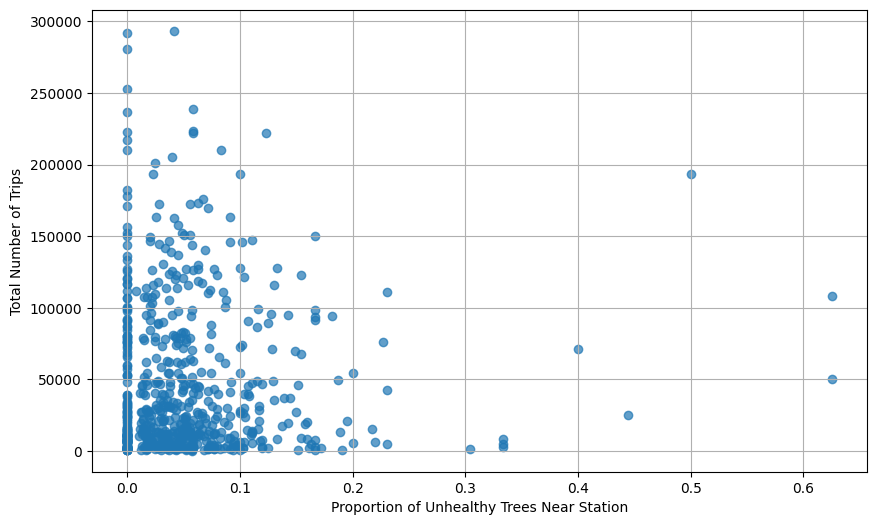

In [20]:
query8 = """
WITH station_trips AS (
  -- count number of trips per station from 2015 to 2018
  SELECT
    start_station_name, COUNT(*) AS total_trips
  FROM
    `bigquery-public-data.new_york_citibike.citibike_trips`
  WHERE
    EXTRACT(YEAR FROM starttime) BETWEEN 2015 AND 2018
  GROUP BY
    start_station_name
),

tree_health AS (
  -- count total number of trees and number of unhealthy trees (health = 'Poor') near each station
  SELECT
    s.name, COUNT(t.tree_id) AS total_trees,
    SUM(CASE WHEN t.health = 'Poor' THEN 1 ELSE 0 END) AS unhealthy_trees
  FROM
    `bigquery-public-data.new_york_citibike.citibike_stations` s
  LEFT JOIN
    `bigquery-public-data.new_york_trees.tree_census_2015` t
  ON
    ST_DISTANCE(ST_GEOGPOINT(s.longitude, s.latitude),
                ST_GEOGPOINT(t.longitude, t.latitude)) <= 100
  GROUP BY
    s.name
)

SELECT
  th.name, st.total_trips, th.total_trees, th.unhealthy_trees,
  SAFE_DIVIDE(th.unhealthy_trees, th.total_trees) AS proportion_unhealthy_trees -- Calculate the proportion of healthy trees
FROM
  tree_health th
JOIN
  station_trips st ON th.name = st.start_station_name
ORDER BY
  SAFE_DIVIDE(th.unhealthy_trees, th.total_trees) DESC;
  """
df = client.query(query8).to_dataframe()
plt.figure(figsize=(10, 6))
plt.scatter(df['proportion_unhealthy_trees'], df['total_trips'], alpha=0.7)
plt.xlabel('Proportion of Unhealthy Trees Near Station')
plt.ylabel('Total Number of Trips')
plt.grid(True)
plt.show()

_______________________________________________________________